In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# data
x = list(range(0, 60, 1))
data = pd.read_csv("2-4-Comp.csv", index_col=False)
ell_75 = data['ell_75'].to_list()
ell_50 = data['ell_50'].to_list()
ell_30 = data['ell_30'].to_list()

In [3]:
# font size
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=16)
plt.rc('axes', titlesize=18)
plt.rc('text', usetex=True)
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['text.latex.preamble'] = [
    r'\usepackage{tgheros}',    # helvetica font
    r'\usepackage{sansmath}',   # math-font matching helvetica
    r'\sansmath'                # actually tell tex to use it!
    r'\usepackage{siunitx}',    # micro symbols
    r'\sisetup{detect-all}',    # force siunitx to use the fonts
]

<ipython-input-3-b3fe6e799c48>:9: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [


<ipython-input-5-e243d048f703>:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


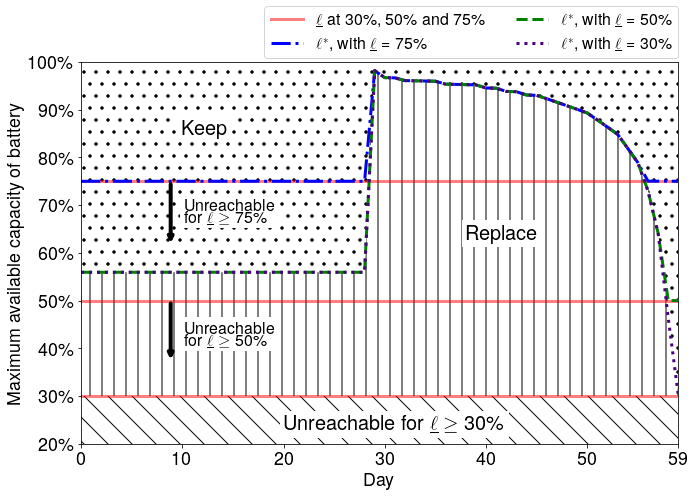

In [5]:
# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
# thresholds
ax.plot(
    x, [0.75] * len(x), linestyle='-', linewidth=3, color='red', alpha=0.5,
    # label='Minimum replacement threshold at 30\%, 50\% and 75\%'
    label=r'$\underline{\ell}$ at 30\%, 50\% and 75\%'
)
ax.plot(
    x, [0.50] * len(x), linestyle='-', linewidth=3, color='red', alpha=0.5,
    # label=r'$\underline{\ell}$' + ' -- minimum replacement threshold' 
)
ax.plot(
    x, [0.30] * len(x), linestyle='-', linewidth=3, color='red', alpha=0.5,
    # label=r'$\underline{\ell}$' + ' -- minimum replacement threshold' 
)
# optimal policy
ax.plot(
    x, ell_75, linestyle='-.', linewidth=3, color='blue',
    # label='Optimal replacement threshold for ' + r'$\underline{\ell}=75\%$'
    label=r'$\ell^*$, with $\underline{\ell}=75\%$'
)
ax.plot(
    x, ell_50, linestyle='--', linewidth=3, color='green',
    # label='Optimal replacement threshold for ' + r'$\underline{\ell}=50\%$'
    label=r'$\ell^*$, with $\underline{\ell}=50\%$'
)
ax.plot(
    x, ell_30, linestyle=':', linewidth=3, color='indigo',
    # label='Optimal replacement threshold for ' + r'$\underline{\ell}=30\%$'
    label=r'$\ell^*$, with $\underline{\ell}=30\%$'
)

# fill with shade -- Keep, 0.75
ax.fill_between(
    x, [1.00] * len(x), ell_30,
    facecolor='w', hatch = '.'
)
ax.text(
    10, 0.85, 'Keep', fontsize=20,
    bbox = dict(facecolor = 'w', alpha = 1.0, linewidth=0)
)
# fill with shade -- Replace
ax.fill_between(
    x, [0.30] * len(x), ell_30,
    facecolor='w', hatch = '|'
)
ax.text(
    38, 0.63, 'Replace', fontsize=20,
    bbox = dict(facecolor = 'w', alpha = 1.0, linewidth=0)
)
# fill with shade -- Bottom
ax.fill_between(
    x, [0.30] * len(x), [0.20] * len(x),
    facecolor='w', hatch = '\\'
)

ax.text(
    10.2, 0.69,
    r'\flushleft Unreachable\\for $\underline{\ell}\ge 75\%$',
    fontsize=16,
    bbox = dict(facecolor = 'w', alpha = 1.0, linewidth=0)
)
ax.annotate(
    '',
    xy=(0.15, 0.52), xytext=(0.15, 0.685), xycoords='axes fraction',
    arrowprops=dict(arrowstyle='->', lw=4.0)
)

ax.text(
    10.2, 0.433,
    r'\flushleft Unreachable\\for $\underline{\ell}\ge 50\%$',
    fontsize=16,
    bbox = dict(facecolor = 'w', alpha = 1.0, linewidth=0)
)
ax.annotate(
    '',
    xy=(0.15, 0.215), xytext=(0.15, 0.373), xycoords='axes fraction',
    arrowprops=dict(arrowstyle='-|>', lw=4.0)
)

ax.text(
    20, 0.23, r'Unreachable for $\underline{\ell}\ge 30\%$', fontsize=20,
    bbox = dict(facecolor = 'w', alpha = 1.0, linewidth=0)
)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.set_xlim(0, 59)
ax.set_ylim(0.20, 1.00)
ax.set_xticks([0, 10, 20, 30, 40, 50, 59])
ax.set_xlabel("Day")
ax.set_ylabel("Maximum available capacity of battery")
ax.legend(loc=(0.307, 1.01), ncol=2)
fig.tight_layout()
fig.savefig("2-4-Comp.png", dpi=600)
fig.savefig("2-4-Comp_red.png", dpi=100)
fig.show()